In [43]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
from collections import Counter
import matplotlib.pyplot as plt
sb.set()

# Introduction

Happywhale is a NGO founded in 2015 with a mission to increase global understanding and caring for marine environments. Their main activities include monitoring, photographing, and identifying whale species around the world for conservation purposes. Volunteers around the world uploads thousands of pictures of whales, which are then manually identified by humans in a very time-consuming process. 

The Kaggle competition was established to build an automated process for identification, saving thousands of manual labor and improving accuracy. Our scope for the mini-project is to use neural networks, to help identify the species show in the photo.

We'll start of by importing the original training set provided by the facilitator of the competion: 

In [48]:
data = pd.read_csv('train.csv')

The dataset is very significant, with more than 50k entries. We'll have a closer look at the distribution of data within the dataframe:

In [50]:
data.count()

image            51033
species          51033
individual_id    51033
dtype: int64

In [76]:
print('Train samples count: ', len(data))
data.columns

Train samples count:  51033


Index(['image', 'species', 'individual_id', 'whale_dolphin'], dtype='object')

For now, the dataset consists of 30 different species and more than 15k individual ID's for whales and dolphins - that is the total amount of unique individuals that have been identified. For the scope of this project, we won't attempt to predict the individual ID but instead just the species.

In [68]:
print('Species Count: ',len(data['species'].value_counts()))
data['species'].value_counts()

Species Count:  30


bottlenose_dolphin           9664
beluga                       7443
humpback_whale               7392
blue_whale                   4830
false_killer_whale           3326
dusky_dolphin                3139
spinner_dolphin              1700
melon_headed_whale           1689
minke_whale                  1608
killer_whale                 1493
fin_whale                    1324
gray_whale                   1123
bottlenose_dolpin            1117
kiler_whale                   962
southern_right_whale          866
spotted_dolphin               490
sei_whale                     428
short_finned_pilot_whale      367
common_dolphin                347
cuviers_beaked_whale          341
pilot_whale                   262
long_finned_pilot_whale       238
white_sided_dolphin           229
brydes_whale                  154
pantropic_spotted_dolphin     145
globis                        116
commersons_dolphin             90
pygmy_killer_whale             76
rough_toothed_dolphin          60
frasiers_dolph

Data cleaning: We identified a couple of duplicates in the dataset. Furthermore we grouped some of the same species that had been seperated under synonyms.


bottlenose_dolpin -> bottlenose_dolphin
kiler_whale -> killer_whale
beluga -> beluga_whale


globis & pilot_whale -> short_finned_pilot_whale

In [69]:
data.species.replace({"globis": "short_finned_pilot_whale",
                          "pilot_whale": "short_finned_pilot_whale",
                          "kiler_whale": "killer_whale",
                          "bottlenose_dolpin": "bottlenose_dolphin"}, inplace=True)

This brings our new count of individual species down to 26 total. 

In [75]:
whale_species = ["humpback_whale", "beluga", "blue_whale", "fin_whale", "southern_right_whale",
                "gray_whale", "minke_whale", "cuviers_beaked_whale", "sei_whale", "brydes_whale"]

data["whale_dolphin"] = ["whale" if x in whale_species else "dolphin" for x in data.species]
data.head()

,image,species,individual_id,whale_dolphin
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,dolphin
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,whale
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,dolphin
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,dolphin
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,whale


The overall distribution of whales to dolphins seem to be relatively equal, with around 25-26k of each. 

<AxesSubplot:xlabel='count', ylabel='whale_dolphin'>

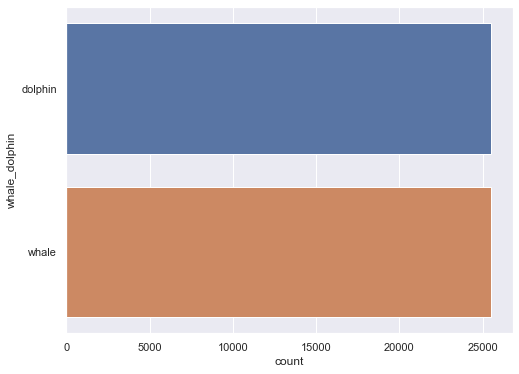

In [18]:
plt.figure(figsize = (8,6))
sb.countplot(y = 'whale_dolphin', data = data, orient = "h")

Below we visualized the imbalance of the different species. As we see below, the , the dataset has a heavy class imbalance, with counts of species varying from +10.000 to just 14. With a dataset this unbalanced, it will become challenging to perform machine learning. The standard approach of under-sampling won’t be applicable, as our dataset would then be too small. Oversampling would be possible to some extend through image augmentation, but the class imbalance is too extreme in this case. Furthermore, this would result in an even bigger dataset, which is not favourable. So far this has pointed us in the direction of using (deep learning). 

<AxesSubplot:xlabel='count', ylabel='species'>

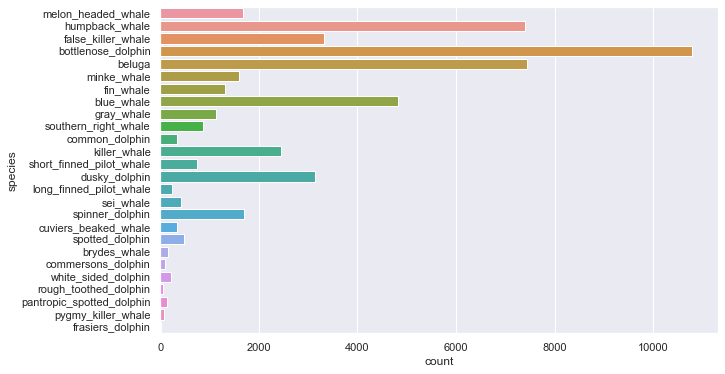

In [19]:
plt.figure(figsize = (10,6))
sb.countplot(y = 'species', data = data, orient = "h")

In [20]:
test = data['species'].value_counts()
print(test)

bottlenose_dolphin           10781
beluga                        7443
humpback_whale                7392
blue_whale                    4830
false_killer_whale            3326
dusky_dolphin                 3139
killer_whale                  2455
spinner_dolphin               1700
melon_headed_whale            1689
minke_whale                   1608
fin_whale                     1324
gray_whale                    1123
southern_right_whale           866
short_finned_pilot_whale       745
spotted_dolphin                490
sei_whale                      428
common_dolphin                 347
cuviers_beaked_whale           341
long_finned_pilot_whale        238
white_sided_dolphin            229
brydes_whale                   154
pantropic_spotted_dolphin      145
commersons_dolphin              90
pygmy_killer_whale              76
rough_toothed_dolphin           60
frasiers_dolphin                14
Name: species, dtype: int64


First we chose to sort out some of the least frequent species in the dataset. 

In [21]:
values = ["frasiers_dolphin", "rough_toothed_dolphin", "pygmy_killer_whale", "commersons_dolphin", "pantropic_spotted_dolphin", "brydes_whale", "white_sided_dolphin", "long_finned_pilot_whale"]

#drop rows that contain any value in the list
df = data[data.species.isin(values) == False]

Even though we have now removed some of the least frequent, we still have approimately the same size dataset. Since the original training set takes up approx. 57GB we don't consider it feasible to use the whole set.

In [22]:
test = df['species'].value_counts()
print(test)

bottlenose_dolphin          10781
beluga                       7443
humpback_whale               7392
blue_whale                   4830
false_killer_whale           3326
dusky_dolphin                3139
killer_whale                 2455
spinner_dolphin              1700
melon_headed_whale           1689
minke_whale                  1608
fin_whale                    1324
gray_whale                   1123
southern_right_whale          866
short_finned_pilot_whale      745
spotted_dolphin               490
sei_whale                     428
common_dolphin                347
cuviers_beaked_whale          341
Name: species, dtype: int64


In [23]:
test = df['whale_dolphin'].value_counts()
print(test)

whale      25355
dolphin    24672
Name: whale_dolphin, dtype: int64


In [24]:
print(pd.unique(df['species']))

['melon_headed_whale' 'humpback_whale' 'false_killer_whale'
 'bottlenose_dolphin' 'beluga' 'minke_whale' 'fin_whale' 'blue_whale'
 'gray_whale' 'southern_right_whale' 'common_dolphin' 'killer_whale'
 'short_finned_pilot_whale' 'dusky_dolphin' 'sei_whale' 'spinner_dolphin'
 'cuviers_beaked_whale' 'spotted_dolphin']


In [25]:
df.head()

,image,species,individual_id,whale_dolphin
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,dolphin
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,whale
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,dolphin
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,dolphin
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,whale


<AxesSubplot:xlabel='count', ylabel='whale_dolphin'>

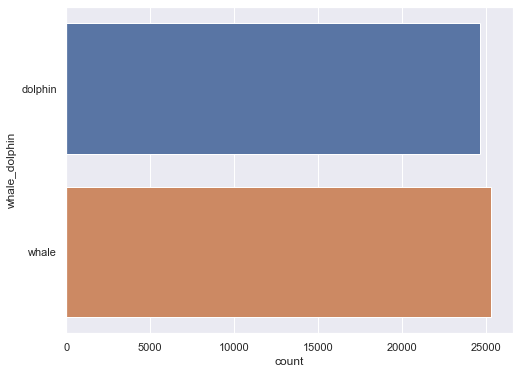

In [26]:
plt.figure(figsize = (8,6))
sb.countplot(y = 'whale_dolphin', data = df, orient = "h")

In [27]:
values = ["dolphin"]

#drop rows that contain any value in the list
df1 = df[df.whale_dolphin.isin(values) == False]


<AxesSubplot:xlabel='count', ylabel='species'>

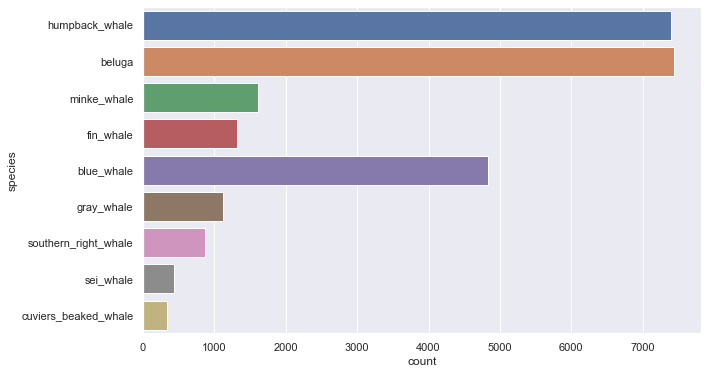

In [28]:
plt.figure(figsize = (10,6))
sb.countplot(y = 'species', data = df1, orient = "h")

In [29]:
test = df1['species'].value_counts()
print(test)

beluga                  7443
humpback_whale          7392
blue_whale              4830
minke_whale             1608
fin_whale               1324
gray_whale              1123
southern_right_whale     866
sei_whale                428
cuviers_beaked_whale     341
Name: species, dtype: int64


In [30]:
values = ["whale"]

#drop rows that contain any value in the list
df2 = df[df.whale_dolphin.isin(values) == False]

In [31]:
test = df2['species'].value_counts()
print(test)

bottlenose_dolphin          10781
false_killer_whale           3326
dusky_dolphin                3139
killer_whale                 2455
spinner_dolphin              1700
melon_headed_whale           1689
short_finned_pilot_whale      745
spotted_dolphin               490
common_dolphin                347
Name: species, dtype: int64


bottlenose_dolphin          10781
false_killer_whale           3326
dusky_dolphin                3139

beluga                  7443
humpback_whale          7392
blue_whale              4830

In [32]:
values = ["bottlenose_dolphin", "false_killer_whale", "dusky_dolphin", "beluga", "humpback_whale", "blue_whale"]

Selected = data[data.species.isin(values) == True]

In [33]:
Selected.head()

,image,species,individual_id,whale_dolphin
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,whale
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,dolphin
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,dolphin
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,whale
5,000a8f2d5c316a.jpg,bottlenose_dolphin,b9907151f66e,dolphin


To circumvent some of the most challenging aspects of the dataset; mainly size and class imbalance, we have chosen to reduce our dataset to contain the 3 most common species of whales and dolphins, with a randomly sampled 500 images for each. This significantly reduces the overall size of the dataset, and reduce processing time for our model. 

In [34]:
values = ["bottlenose_dolphin"]
bottlenose_dolphin = data[data.species.isin(values) == True]
bottlenose_dolphin = bottlenose_dolphin.sample(n=500, random_state=1)

In [35]:
values = ["false_killer_whale"]
false_killer_whale = data[data.species.isin(values) == True]
false_killer_whale = false_killer_whale.sample(n=500, random_state=1)

In [36]:
values = ["dusky_dolphin"]
dusky_dolphin = data[data.species.isin(values) == True]
dusky_dolphin = dusky_dolphin.sample(n=500, random_state=1)

In [37]:
values = ["beluga"]
beluga = data[data.species.isin(values) == True]
beluga = beluga.sample(n=500, random_state=1)

In [38]:
values = ["humpback_whale"]
humpback_whale = data[data.species.isin(values) == True]
humpback_whale = humpback_whale.sample(n=500, random_state=1)

In [39]:
values = ["blue_whale"]
blue_whale = data[data.species.isin(values) == True]
blue_whale = blue_whale.sample(n=500, random_state=1)

In [40]:
Final = pd.concat([blue_whale, humpback_whale, beluga, dusky_dolphin, false_killer_whale, bottlenose_dolphin])

<AxesSubplot:xlabel='count', ylabel='species'>

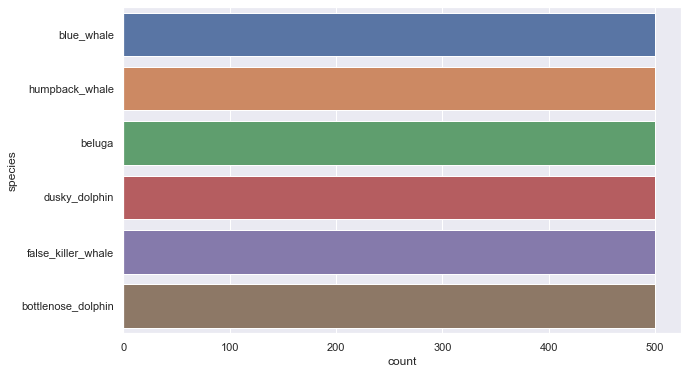

In [41]:
plt.figure(figsize = (10,6))
sb.countplot(y = 'species', data = Final, orient = "h")

In [42]:
Final.to_csv('./final.csv')